# Image Recognition using Convolutional Neural Network

### Importing the libraries

In [25]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [26]:
tf.__version__

'2.14.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('C:/Users/Kartik/Desktop/C++/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 557 images belonging to 2 classes.


### Preprocessing the Test set

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/Kartik/Desktop/C++/dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 140 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [29]:
x=np.concatenate([test_set.next()[0] for i in range(test_set.__len__())])
y=np.concatenate([test_set.next()[1] for i in range(test_set.__len__())])




In [30]:
x

array([[[[0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         ...,
         [0.7294118 , 0.8235295 , 0.        ],
         [0.73333335, 0.82745105, 0.00392157],
         [0.7254902 , 0.8196079 , 0.        ]],

        [[0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         ...,
         [0.73333335, 0.82745105, 0.00392157],
         [0.73333335, 0.82745105, 0.00392157],
         [0.7254902 , 0.8196079 , 0.        ]],

        [[0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         [0.7294118 , 0.8235295 , 0.        ],
         ...,
         [0.7411765 , 0.8352942 , 0.01176471],
         [0.7372549 , 0.8313726 , 0.00784314],
         [0.7254902 , 0.8196079 , 0.        ]],

        ...,

        [[0.7294118 , 0.82745105, 0.        ],
         [0.7294118 , 0.8235295 , 0.        ]

In [31]:
cnn = tf.keras.models.Sequential()


### Step 1 - Convolution

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [33]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [35]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [36]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [37]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [38]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [39]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Epoch 1/5


18/18 [==============================] - 16s 679ms/step - loss: 0.7376 - accuracy: 0.4973 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
18/18 [==============================] - 11s 628ms/step - loss: 0.6852 - accuracy: 0.5368 - val_loss: 0.7317 - val_accuracy: 0.5000
Epoch 3/5
18/18 [==============================] - 11s 607ms/step - loss: 0.6842 - accuracy: 0.5691 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 4/5
18/18 [==============================] - 11s 621ms/step - loss: 0.6757 - accuracy: 0.5548 - val_loss: 0.6879 - val_accuracy: 0.5286
Epoch 5/5
18/18 [==============================] - 11s 613ms/step - loss: 0.6674 - accuracy: 0.6212 - val_loss: 0.6888 - val_accuracy: 0.5857


## Part 4 - Making a single prediction

In [48]:
import numpy as np
import keras.utils as image
test_image = image.load_img('C:/Users/Kartik/Desktop/C++/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 105ms/step


In [49]:
print(prediction)

dog


In [42]:
cnn.save("cnn_model.h5")

C:\Users\Kartik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
from tinymlgen import port
c_code = port(cnn, variable_name='cnn_textfile', pretty_print=True, optimize=False) 

with open('cnn_textfile.h', 'w') as f:
    print(c_code, file=f)

INFO:tensorflow:Assets written to: C:\Users\Kartik\AppData\Local\Temp\tmpv4cumqyu\assets


INFO:tensorflow:Assets written to: C:\Users\Kartik\AppData\Local\Temp\tmpv4cumqyu\assets


In [44]:
import random
idx = random.randint(0, len(test_set)-1)
print(idx)

1


In [45]:
new_img = x[idx].reshape(x[idx].shape[0], (x[idx].shape[1]*x[idx].shape[2]))
new_img = new_img.transpose()
# Dimensions: [3, n, m]


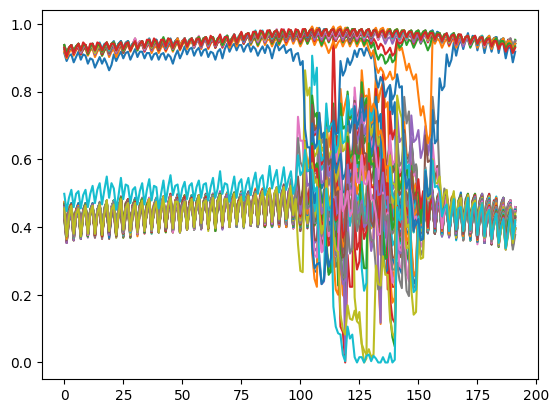

In [46]:
import matplotlib.pyplot as plt

plt.plot(new_img)

In [47]:
with open('x_test.h', 'w') as f:
    print("float x_test_dat[187] = {", file=f)    
    s="    "
    for i in range(64):
        s+=str(x[idx][i])+', '
        if i==63:
            print(s, file=f) 
        elif (i+1)%8==0:
            print(s, file=f)
            s="    "
    print("};", file=f)
f.close()